In [1]:
#import libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

from utils import train
from utils import data_loader
from utils.models import resnet
from utils import valid

from tensorflow import keras

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

Num GPUs Available:  4


In [3]:
#load batch and crop

train_ds, val_ds = data_loader.load_data(64)

Found 252056 files belonging to 2 classes.
Using 201645 files for training.


2021-11-29 14:45:14.597461: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2021-11-29 14:45:14.597567: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31009 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:20:00.0, compute capability: 7.0
2021-11-29 14:45:14.599957: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2021-11-29 14:45:14.599994: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 31009 MB memory:  -> device: 1, name: Tesla V100-PCIE-32GB, pci bus id: 0000:21:00.0, compute capability: 7.0
2021-11-29 14:45:14.602152: W tensorflow/cor

Found 252056 files belonging to 2 classes.
Using 50411 files for validation.


In [4]:
train_ds = train.preprocess_train(train_ds)
val_ds = train.preprocess_train(val_ds)

2021-11-29 14:45:18.340831: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


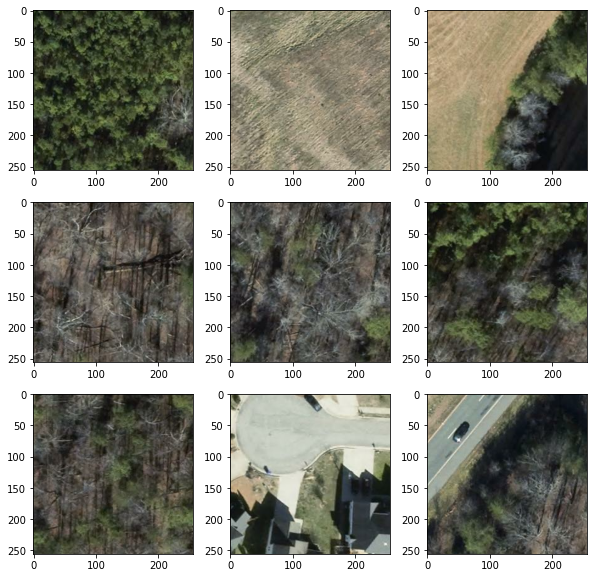

In [5]:
#inspect train_ds

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

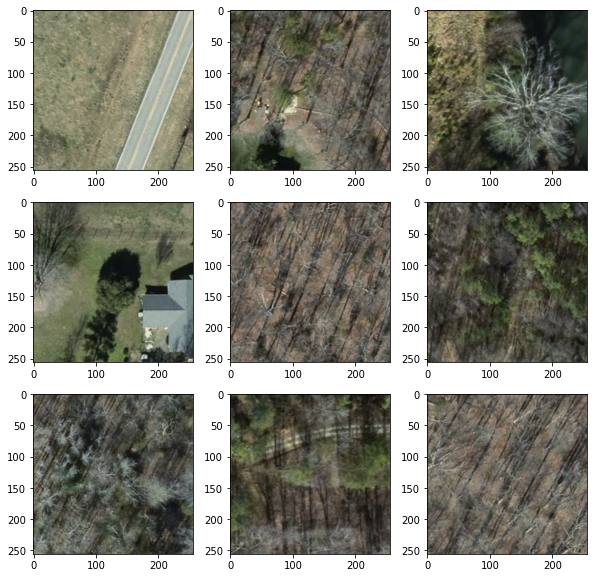

In [6]:
#inspect val_ds

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

In [7]:
resnet50 = resnet.resnet50_model(256)

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        rescaling[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [8]:
resnet50.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [9]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

2021-11-29 14:45:22.773554: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-29 14:45:22.773595: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-29 14:45:22.773641: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 4 GPUs
2021-11-29 14:45:23.824670: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-29 14:45:23.824924: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1749] CUPTI activity buffer flushed


In [ ]:
resnet50.fit(train_ds,
epochs=10,verbose=1, validation_data=val_ds,
callbacks=[tensorboard_callback])

/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100


2021-11-29 14:45:31.093020: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


   1/3151 [..............................] - ETA: 7:46:52 - loss: 1.4873 - accuracy: 0.4219

2021-11-29 14:45:33.337355: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-29 14:45:33.337454: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


   2/3151 [..............................] - ETA: 1:27:51 - loss: 2.8026 - accuracy: 0.4766

2021-11-29 14:45:34.877753: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-29 14:45:34.878272: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1749] CUPTI activity buffer flushed
2021-11-29 14:45:35.059556: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 3979 callback api events and 3526 activity events. 
2021-11-29 14:45:35.119013: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-29 14:45:35.218075: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20211129-144522/train/plugins/profile/2021_11_29_14_45_35

2021-11-29 14:45:35.284527: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/20211129-144522/train/plugins/profile/2021_11_29_14_45_35/workspace.trace.json.gz
2021-11-29 14:45:35.365432: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Crea

3151/3151 [==============================] - 469s 146ms/step - loss: 0.2543 - accuracy: 0.9043 - val_loss: 0.2025 - val_accuracy: 0.9202
Epoch 2/100
3151/3151 [==============================] - 409s 130ms/step - loss: 0.1987 - accuracy: 0.9243 - val_loss: 0.3160 - val_accuracy: 0.8602
Epoch 3/100
3151/3151 [==============================] - 411s 130ms/step - loss: 0.2005 - accuracy: 0.9250 - val_loss: 0.2034 - val_accuracy: 0.9196
Epoch 4/100
3151/3151 [==============================] - 410s 130ms/step - loss: 0.1785 - accuracy: 0.9312 - val_loss: 0.6176 - val_accuracy: 0.7319
Epoch 5/100
3151/3151 [==============================] - 415s 131ms/step - loss: 0.1685 - accuracy: 0.9351 - val_loss: 0.2407 - val_accuracy: 0.9026
Epoch 6/100
3151/3151 [==============================] - 415s 131ms/step - loss: 0.1589 - accuracy: 0.9389 - val_loss: 0.2019 - val_accuracy: 0.9223
Epoch 7/100
3151/3151 [==============================] - 425s 135ms/step - loss: 0.1490 - accuracy: 0.9427 - val_loss: